# PSF fractional pixel test
See how Psf.computeImage() handels fractional pixel positions in the produced PSF image.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.geom as geom
from astropy.visualization import ZScaleInterval

In [2]:
%run -n -i "subtraction_defs.py"

In [3]:
REPO = '/data1/gkovacs/DM-27128-repo3/ingested/rerun/pccd2'
butler = dafPersist.Butler(REPO)

In [4]:
# butler.queryMetadata('src',['visit', 'ccdnum', 'filter'], dataId = {'visit': 419802})
dataId={'visit': 419802, 'ccdnum':25}

In [5]:
calexp = butler.get('calexp', dataId=dataId)
srcCat = butler.get('src', dataId=dataId)

In [6]:
psf = calexp.getPsf()

In [7]:
psfImg = psf.computeImage(geom.Point2D(20.49, 20.49))
print(psfImg.getBBox())
bbox = psfImg.getBBox()

(minimum=(5, 5), maximum=(35, 35))


<IPython.core.display.Javascript object>


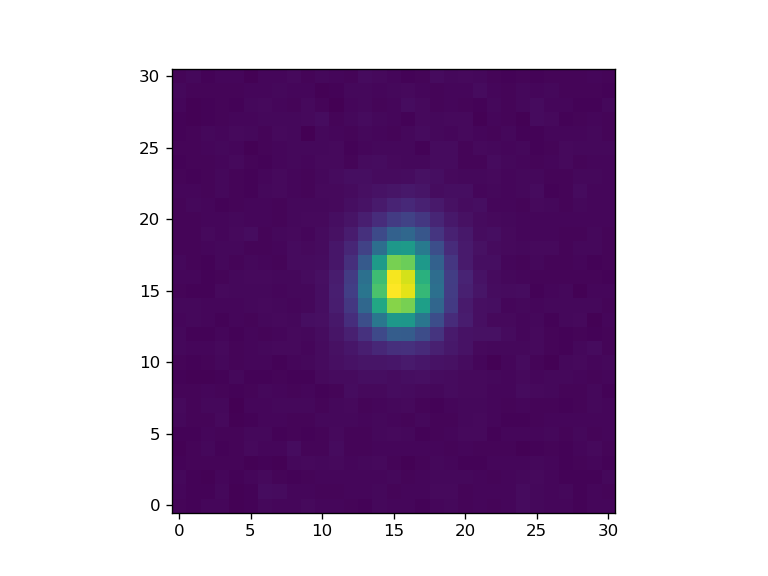

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(psfImg.array, origin='bottom', interpolation='none')

In [18]:
psfImg.getXY0()

Point2I(5, 5)

Create PSF images 4 PSF images from 0. to 0.75px offset

In [9]:
psfImgs = []
for x in np.arange(0., 1., 0.25): 
    psfImgs.append(psf.computeImage(geom.Point2D(20.+x, 20.+x)))

<IPython.core.display.Javascript object>


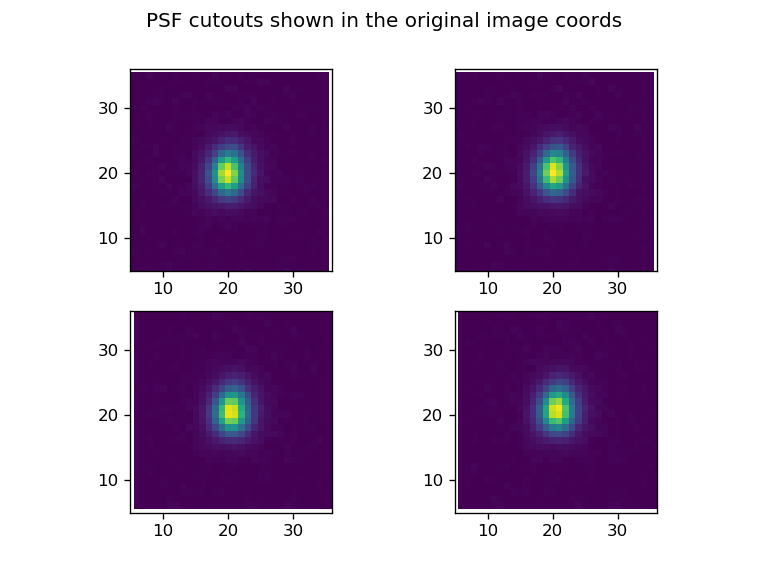

(minimum=(5, 5), maximum=(35, 35))
(minimum=(5, 5), maximum=(35, 35))
(minimum=(6, 6), maximum=(36, 36))
(minimum=(6, 6), maximum=(36, 36))


Text(0.5, 0.98, 'PSF cutouts shown in the original image coords')

In [10]:
fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    bbox = psfImgs[i].getBBox()
    print(bbox)
    ax.imshow(psfImgs[i].array, origin='bottom', interpolation='none', 
              extent=(bbox.getMinX()-0.5, bbox.getMaxX()+0.5, bbox.getMinY()-0.5,
                      bbox.getMaxY()+0.5), vmin=0., vmax=0.035)
    ax.set_xlim(5, 36)
    ax.set_ylim(5, 36)
fig.suptitle("PSF cutouts shown in the original image coords")

Note the white edges as the bbox shifts.

<IPython.core.display.Javascript object>


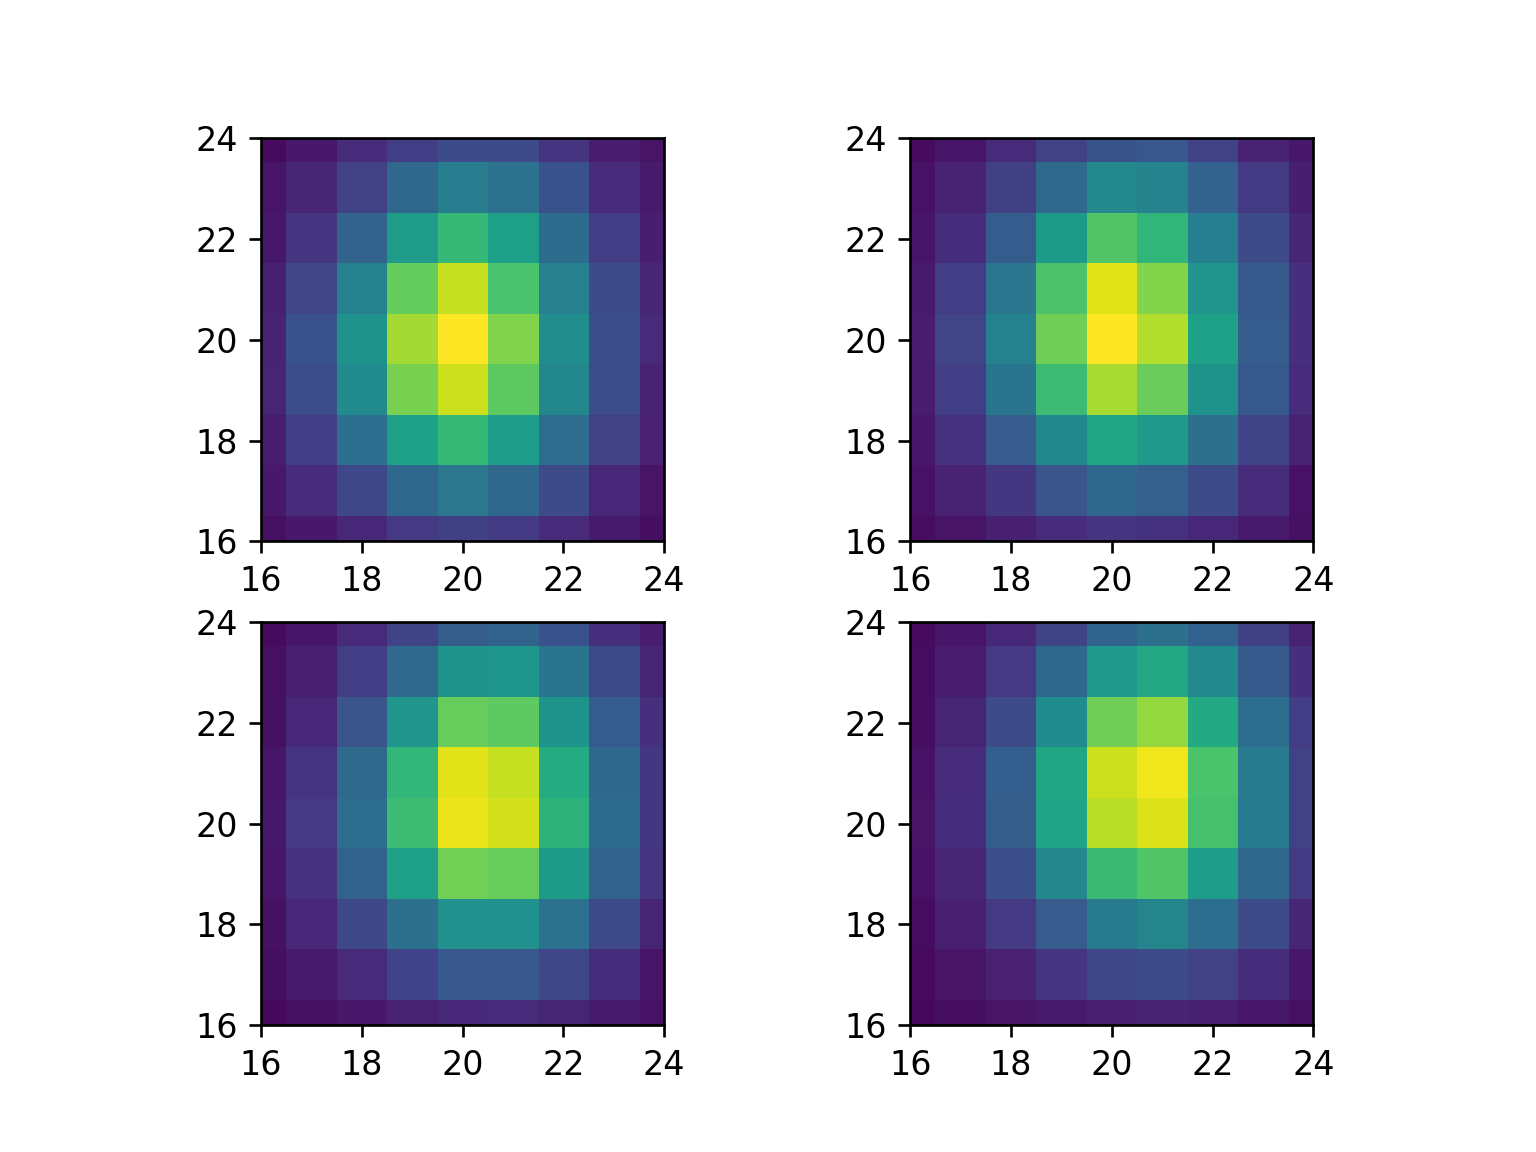

(minimum=(5, 5), maximum=(35, 35))
(minimum=(5, 5), maximum=(35, 35))
(minimum=(6, 6), maximum=(36, 36))
(minimum=(6, 6), maximum=(36, 36))


In [41]:
fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    bbox = psfImgs[i].getBBox()
    print(bbox)
    ax.imshow(psfImgs[i].array, origin='bottom', interpolation='none', 
              extent=(bbox.getMinX()-0.5, bbox.getMaxX()+0.5, bbox.getMinY()-0.5,
                      bbox.getMaxY()+0.5), vmin=0., vmax=0.035)
    ax.set_xlim(16, 24)
    ax.set_ylim(16, 24)

------

bbox is shifted at 0.5 pixel offset, the PSF "movement" within the image is from -0.5px (incl) to +0.5px (excl).